# Statistik

## Import af moduler

In [1]:
import tools
from importlib import reload
reload(tools)
import pprint
pp = pprint.PrettyPrinter(indent=2)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from IPython.display import display, Markdown, Latex, Image

## Udtrækning af prøve

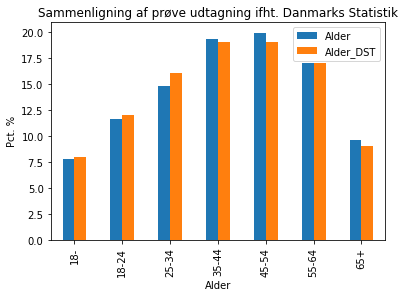

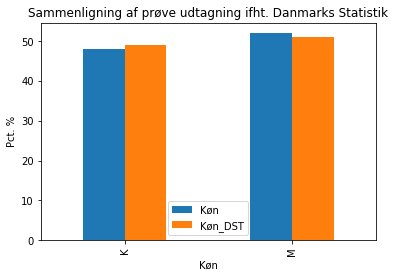

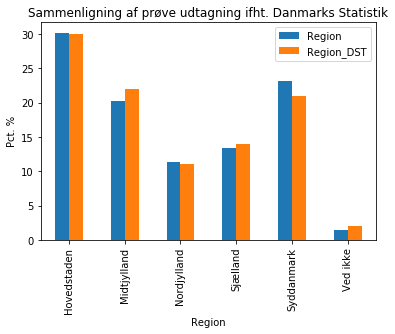

In [2]:
# Udtræk prøve
N = 1000
df, df_i = tools.get_std_sample(N=N)
# Sammenlign prøve
for key in df_i.keys():
    ax = df_i[key].plot.bar(title='Sammenligning af prøve udtagning ifht. Danmarks Statistik')
    ax.set_ylabel("Pct. %")
plt.show()

## Se eksempel på den trukne prøve

In [3]:
print(df.head())
print("Der er %i prøver"%len(df.index))

   Alder Køn       Region  val
0  18-24   M   Syddanmark  1.0
1  45-54   M   Syddanmark  1.0
2  55-64   M     Sjælland  1.0
3  55-64   K  Hovedstaden  1.0
4    65+   K   Syddanmark  1.0
Der er 1000 prøver


# Anvendt notation
Den matematiske notation der efterfølgende anvendes, er taget fra *"An introduction to Error Analysis - The study of uncertainties in physical measurements"*, skrevet af John. R. Taylor. 

$$
\begin{aligned}
\text{Målt værdi af }x &= x_{\mathrm{bedste}} \pm \delta x \\
x_{\mathrm{bedste}} &= \text{bedste bud på }x = \text{gennemsnit af }x = \bar{x} = \frac{1}{N}\sum_{i=1}^N x_i \\
\delta x &= \text{absolut usikkerhed / absolut fejl / fejlmargen  af }x. \\
&\quad \text{Justeres så 95% af målinger falder indenfor } x_{\mathrm{bedste}} \pm \delta x \\
\epsilon_x &= \text{relativ usikkerhed / præcision af }x. \epsilon_x= \frac{\delta x}{|x_{\mathrm{bedste}}|} \text{ eller } \epsilon_x= \frac{\sigma_x}{|\bar{x}|}\\
&\quad \text{Læg mærke til at relativ usikkehed ikke har en enhed.} \\
Var(x) &= \sigma_x^2 = \text{varians af } x = \frac{1}{N-1}\sum(x_i - \bar{x})^2 \\
\sigma_x &= \text{standardarvigelse / spredning af } x = \sqrt{Var(x)} = \sqrt{\sigma_x^2}
\end{aligned} \\
$$

# Lav data til at teste

In [4]:
# Lav en serie. Her er højde på 180 cm, med en relativ usikkerhed på 5%
s = tools.create_rand_series(df=df, mu=180, ex=0.05)

Hvis den relative usikkerhed er 5%, hvad er så den absolutte usikkerhed hvis gennemsnittet er 180 cm?

## Plot af histogram af datapunkter og normalfordeling

Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=180.28, $\sigma_x$=8.8

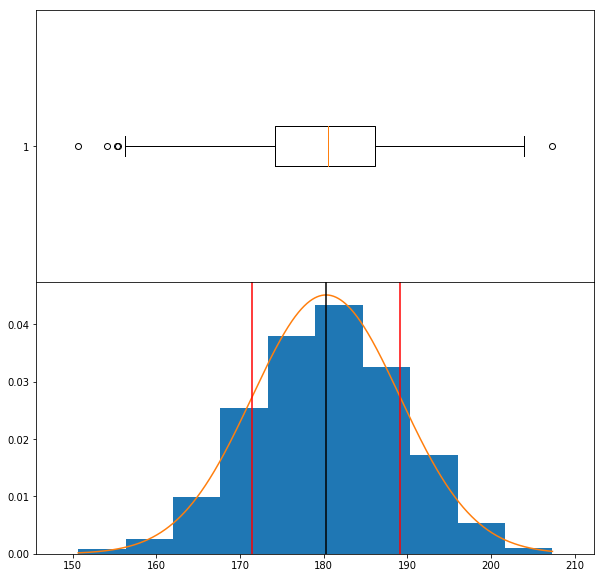

In [5]:
# Plot histogram af punkters
f, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10), sharex=True)
f.subplots_adjust(hspace=0)

_=ax1.boxplot(s, notch=False, sym=None, vert=False)

mean = np.mean(s)
sigma = np.std(s)
x = np.linspace(min(s), max(s), len(s))
# Plot
ax2.hist(s, normed=True)
ax2.plot(x, mlab.normpdf(x, mean, sigma))
ax2.axvline(x=mean, c="k")
ax2.axvline(x=mean+sigma, c="r")
ax2.axvline(x=mean-sigma, c="r")
display(Markdown('Normalfordelingen er beskrevet ved: $ x_{\mathrm{bedste}} $=%1.2f, $\sigma_x$=%1.1f'%(mean, sigma)))

_= ax1.set_xlim(x[0]-5, x[-1]+5)

In [6]:
display(Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/440px-Boxplot_vs_PDF.svg.png"))

## Erstat værdier i tabel

In [7]:
df['val'] = s
df.head()

,Alder,Køn,Region,val
0,18-24,M,Syddanmark,179.558200
1,45-54,M,Syddanmark,188.098182
2,55-64,M,Sjælland,188.083619
3,55-64,K,Hovedstaden,177.713738
4,65+,K,Syddanmark,190.746139


## Lav boxplots

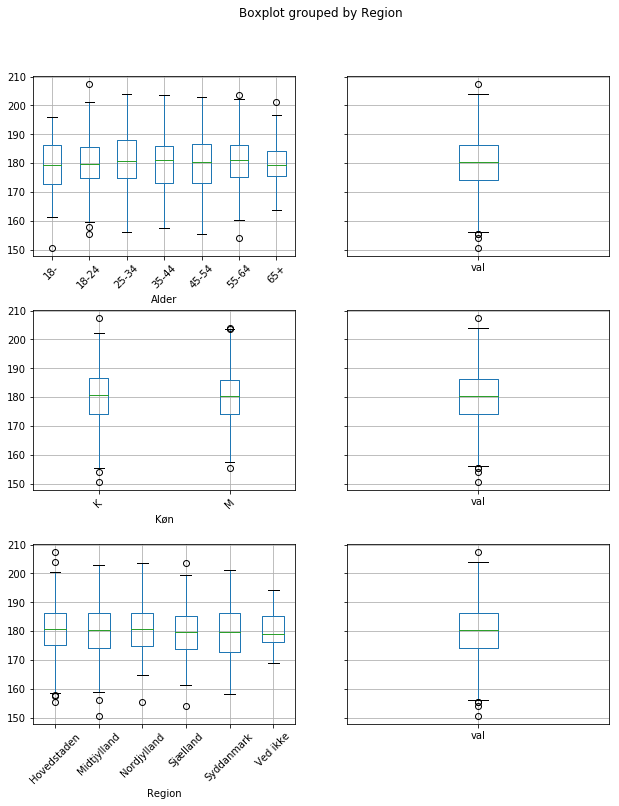

In [8]:
f, axes = plt.subplots(3,2, figsize=(10,12), sharey=True)
f.subplots_adjust(hspace=0.3)
f.subplots_adjust(wspace=2.0)

for i, key in enumerate(df_i.keys()):
    ax = axes[i][0]
    ax2 = axes[i][1]
    df.boxplot(column='val', by=key, ax=ax, rot=45)
    df.boxplot(column='val', ax=ax2)
    ax.set_title("")
plt.show()